To build a script can output historical water quality data with the color of passing standards or not by inputing the "井號" and "法規名稱".

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-talk'])
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # to plot Chinese words properly

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Read data

In [2]:
wa_df = pd.read_excel('data/database_ZAF_wa_merged_20211031.xlsx', parse_dates=['日期時間'])
wa_df.head()

,井名,資料來源,日期時間,井號,緯度,經度,溫度,電導度,氨氮,氫離子濃度指數,...,"1, 1 -二氯乙烯","1, 1 -二氯乙烷","1, 1, 2 -三氯乙烷",二氯甲烷,氯甲烷,甲基第三丁基醚,"1, 1, 1 -三氯乙烷","1,2- 二氯苯",有機氮,懸浮固體物
0,二崙國小,環保署,2000-03-22 00:00:00,4413,23.771842,120.415102,23.5,1130.0,0.210,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,二崙國小,環保署,2000-06-21 00:00:00,4413,23.771842,120.415102,27.0,1060.0,0.205,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,二崙國小,環保署,2000-08-17 00:00:00,4413,23.771842,120.415102,25.0,1080.0,0.190,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,二崙國小,環保署,2000-12-20 00:00:00,4413,23.771842,120.415102,25.8,1040.0,0.165,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,二崙國小,環保署,2002-03-14 11:51:00,4413,23.771842,120.415102,27.6,1060.0,0.090,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
wa_df.iloc[:4, 24: 28]

,鉀,總硬度,總溶解固體物,亞硝酸鹽氮
0,0.130,3.0,NaN,0.270
1,0.215,40.0,NaN,0.025
2,0.205,36.5,NaN,0.145
3,NaN,NaN,NaN,NaN


In [96]:
wa_df.columns[24:28][wa_df.iloc[:4, 24: 28].any(axis=0)]

Index(['鉀', '總硬度', '亞硝酸鹽氮'], dtype='object')

In [3]:
cols = ['項目', '單位', '飲用水水源水質標準第五條', '飲用水水源水質標準第六條', '地下水污染監測標準第一類', 
    '地下水污染監測標準第二類', '地下水污染管制標準第一類', '地下水污染管制標準第二類', 
    '灌溉用水水質標準', '再生水用於工業用途水質基礎建議值一', '再生水用於工業用途水質基礎建議值二']
std_df = pd.read_excel('data/stds_and_cols.xlsx', usecols=cols)
std_df.head()

,項目,單位,飲用水水源水質標準第五條,飲用水水源水質標準第六條,地下水污染監測標準第一類,地下水污染監測標準第二類,地下水污染管制標準第一類,地下水污染管制標準第二類,灌溉用水水質標準,再生水用於工業用途水質基礎建議值一,再生水用於工業用途水質基礎建議值二
0,溫度,℃,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,NaN
1,電導度,μS/cm25℃,NaN,NaN,NaN,NaN,NaN,NaN,750,250,800
2,氫離子濃度指數,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0-9.0,6.0-9.0,6.0-8.5
3,化學需氧量,mg/L,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,溶氧量,mg/L,NaN,NaN,NaN,NaN,NaN,NaN,3以上,NaN,NaN


# Plot

In [10]:
standard = '飲用水水源水質標準第五條'
#wa_df[wa_df['井號'] == siteid]
std_df.loc[~std_df[standard].isna(), ['項目', standard]]

,項目,飲用水水源水質標準第五條
3,化學需氧量,25.000
12,大腸桿菌群,20000.000
15,總有機碳,4.000
19,氨氮,1.000
27,鎘,0.010
29,砷,0.050
31,鉛,0.050
34,鉻,0.050
35,汞,0.002
36,硒,0.050


In [38]:
siteid = 4413
wa_df.loc[wa_df['井號'] == siteid, wa_df.columns.isin(std_df.loc[~std_df[standard].isna(), '項目'])]

,氨氮,總有機碳,砷,鎘,鉻,鉛,大腸桿菌群,汞
0,0.210,NaN,NaN,0.0050,0.0050,NaN,NaN,NaN
1,0.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.190,NaN,NaN,0.0050,0.0050,NaN,NaN,NaN
3,0.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.090,0.46,0.00830,0.0005,0.0060,0.0070,NaN,NaN
...,...,...,...,...,...,...,...,...
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,0.030,0.36,0.00040,0.0005,0.0005,0.0015,NaN,0.00015
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,0.050,0.38,0.00045,0.0005,0.0005,0.0015,NaN,0.00015


In [27]:
 X[analyte] < y.loc[y['項目'] == analyte, standard].values[0]

0        True
1        True
2        True
3        True
4        True
        ...  
4787     True
4788     True
4789    False
4790     True
4791     True
Name: 氨氮, Length: 4792, dtype: bool

In [62]:
wa_df['日期'] = pd.to_datetime([_.strftime('%Y-%m-%d') for _ in wa_df['日期時間']])

In [57]:
print(wa_df['日期時間'].max())
print(wa_df['日期時間'].min())

2020-11-13 12:04:00
1992-06-08 00:00:00


In [40]:
X

,日期時間,氨氮,總有機碳,砷,鎘,鉻,鉛,大腸桿菌群,汞
0,2000-03-22 00:00:00,0.210,NaN,NaN,0.0050,0.0050,NaN,NaN,NaN
1,2000-06-21 00:00:00,0.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-08-17 00:00:00,0.190,NaN,NaN,0.0050,0.0050,NaN,NaN,NaN
3,2000-12-20 00:00:00,0.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-14 11:51:00,0.090,0.46,0.00830,0.0005,0.0060,0.0070,NaN,NaN
...,...,...,...,...,...,...,...,...,...
71,2019-05-20 09:47:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,2019-10-25 11:26:00,0.030,0.36,0.00040,0.0005,0.0005,0.0015,NaN,0.00015
73,2020-04-24 10:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,2020-05-13 09:29:00,0.050,0.38,0.00045,0.0005,0.0005,0.0015,NaN,0.00015


In [44]:
X[analyte]

日期時間
2000-03-22 00:00:00    0.210
2000-06-21 00:00:00    0.205
2000-08-17 00:00:00    0.190
2000-12-20 00:00:00    0.165
2002-03-14 11:51:00    0.090
                       ...  
2019-05-20 09:47:00      NaN
2019-10-25 11:26:00    0.030
2020-04-24 10:05:00      NaN
2020-05-13 09:29:00    0.050
2020-10-29 10:40:00      NaN
Name: 氨氮, Length: 76, dtype: float64

<AxesSubplot:xlabel='日期'>

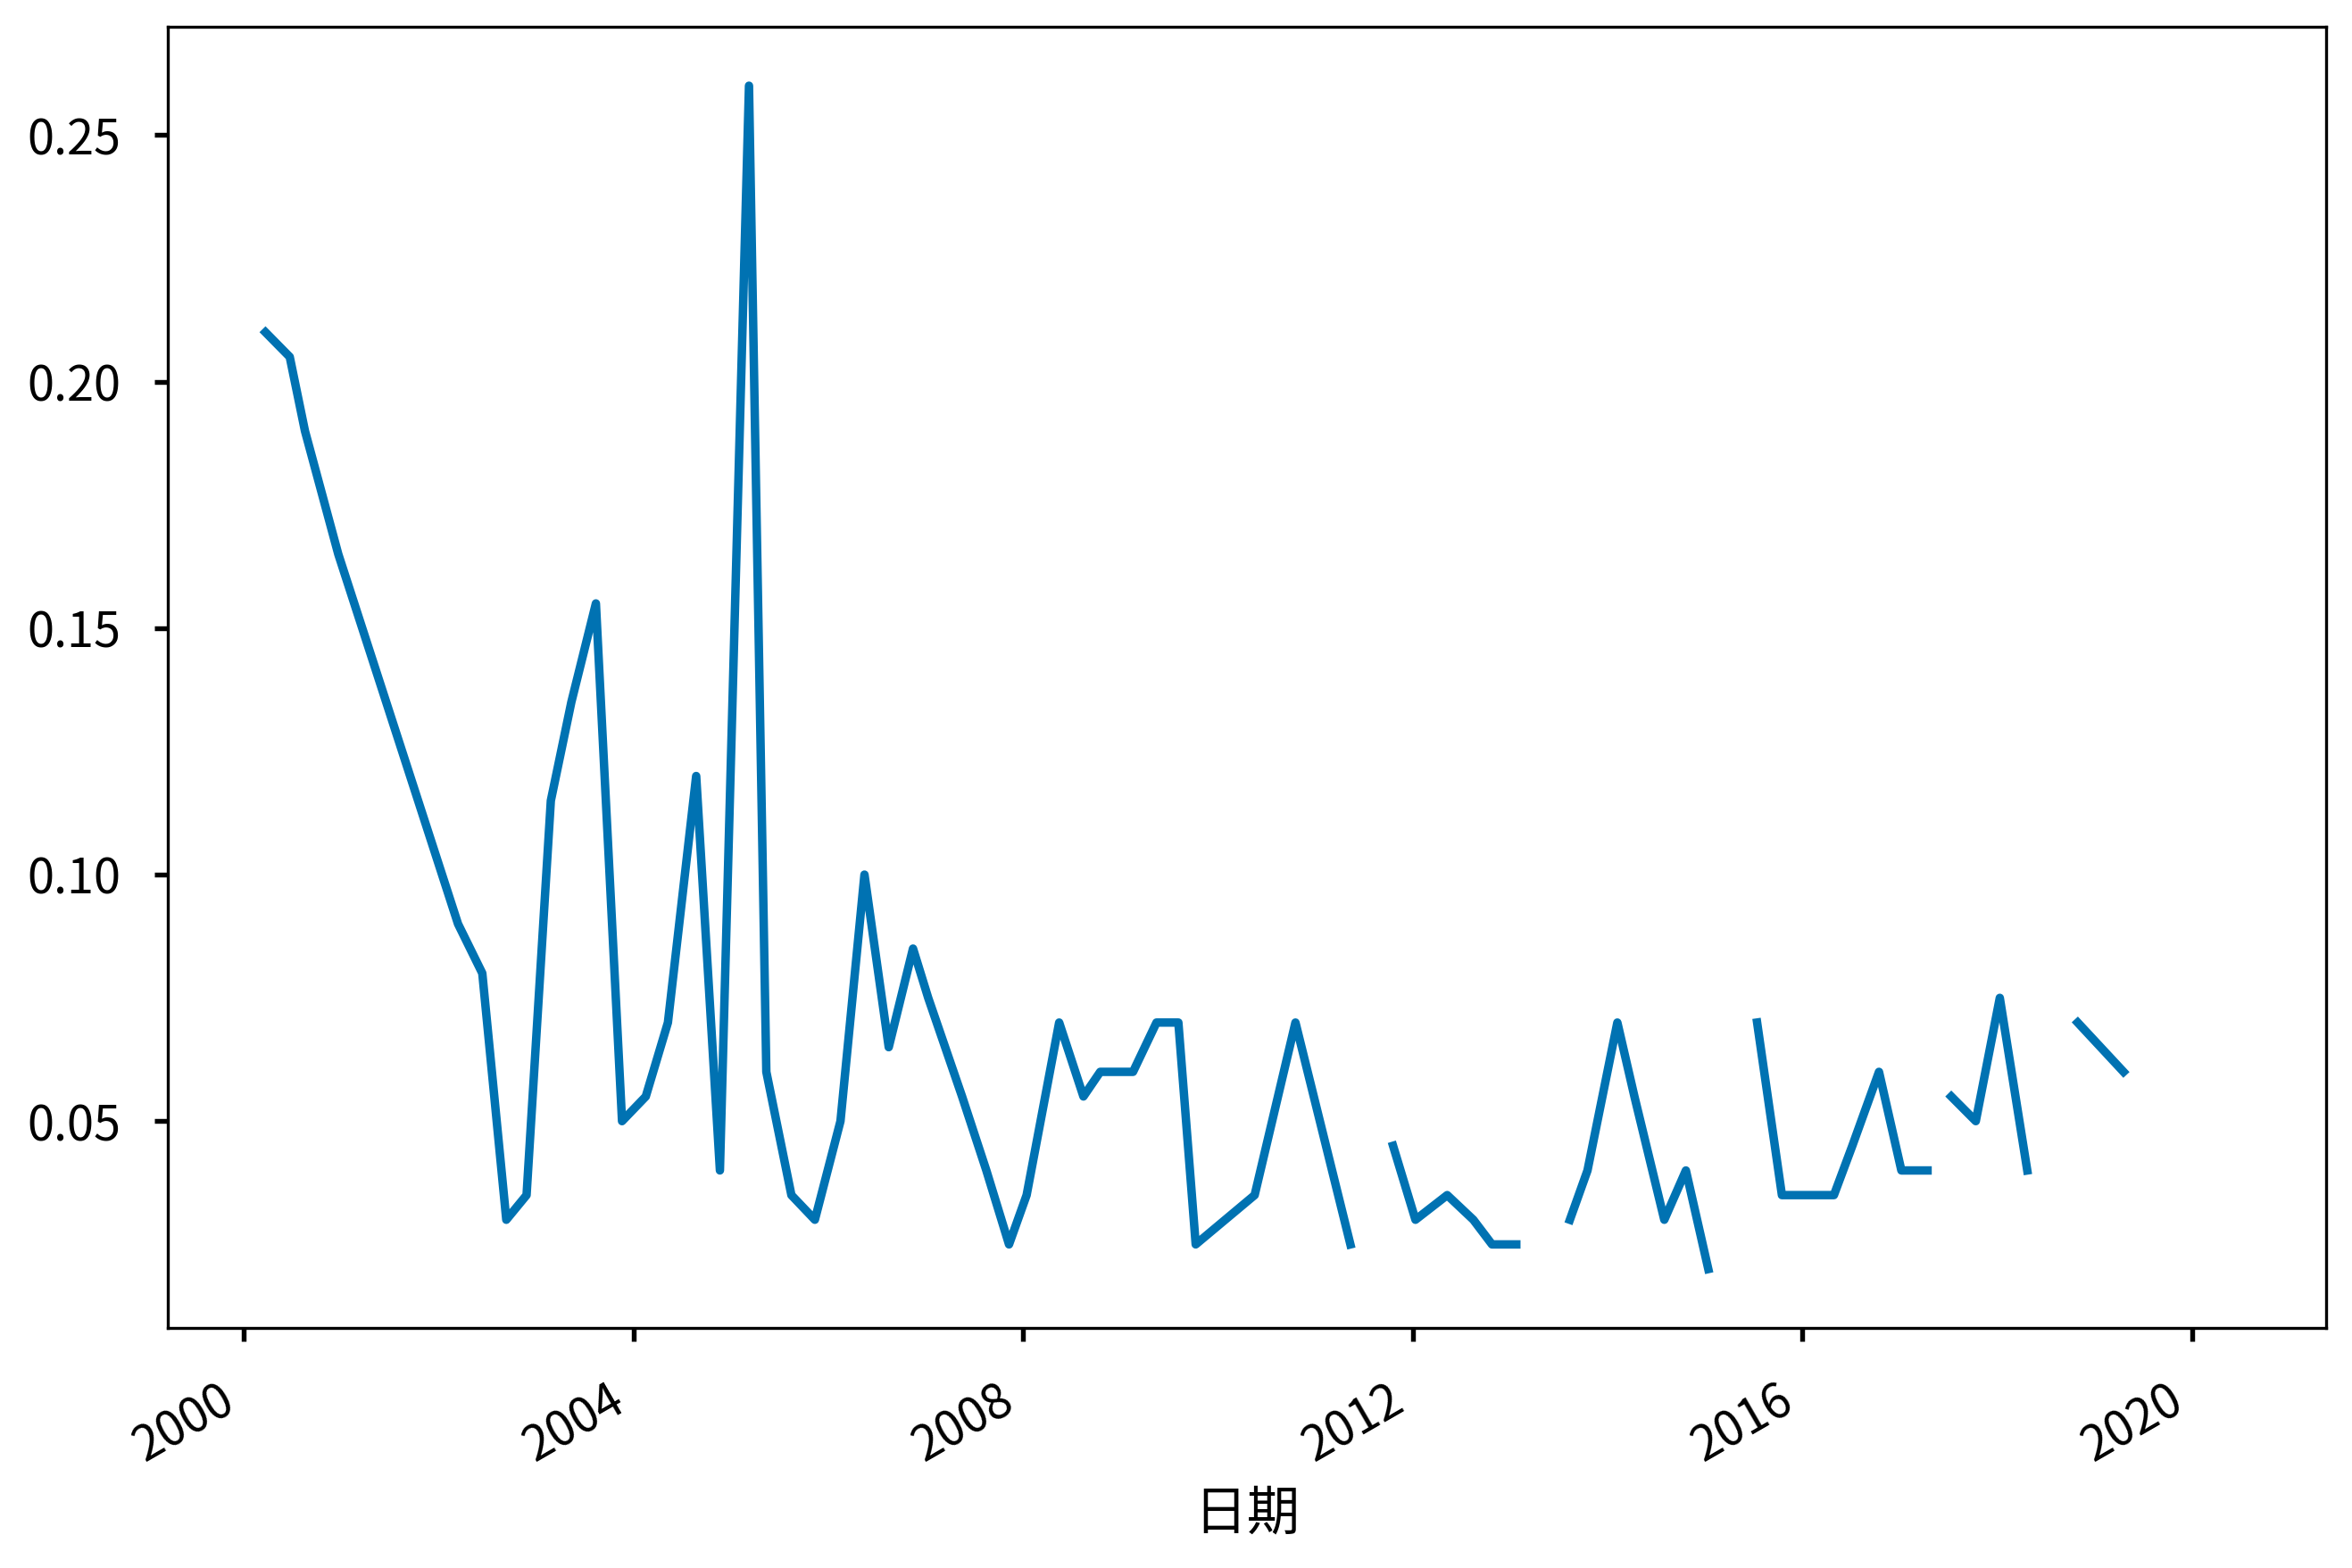

In [67]:
X[analyte].plot()

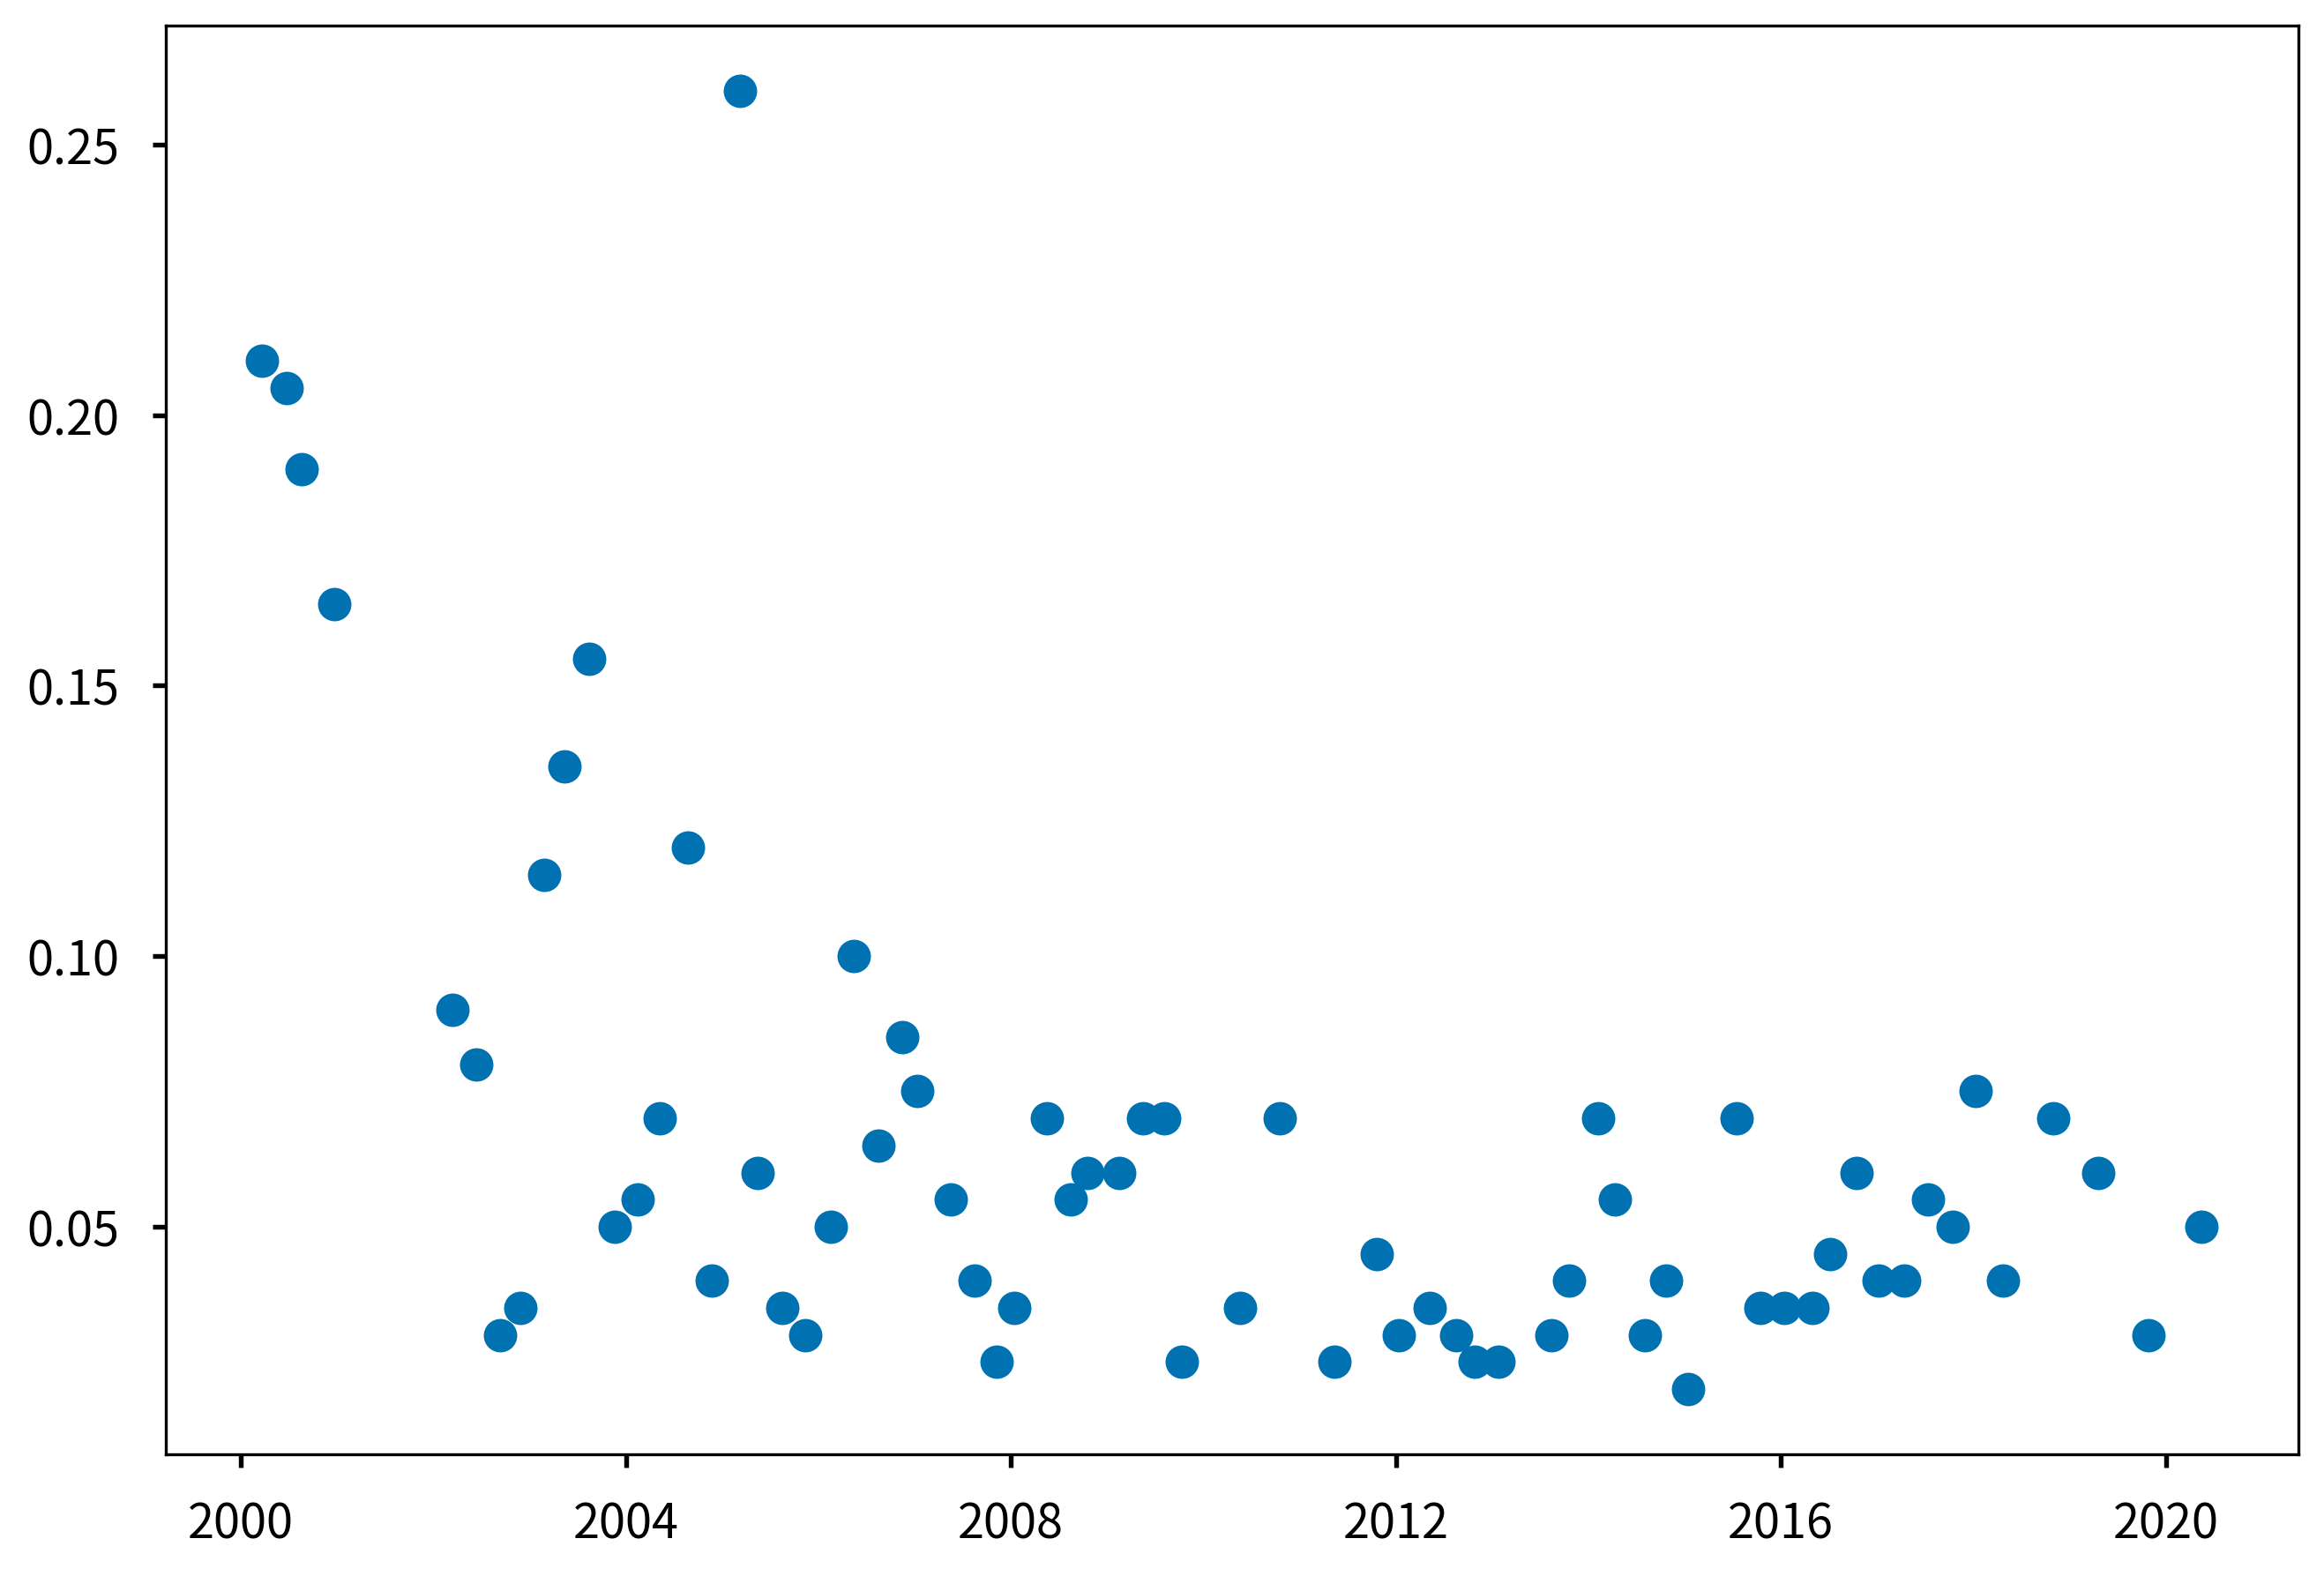

In [68]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot_date(X.index, X[analyte], c='C0', xdate=True)

# Set x-axis major ticks to weekly interval, on Mondays
#ax.xaxis.set_major_locator(mdates.YearLocator())

In [99]:
X.columns.isin(cols) & X.any()

井名               False
資料來源             False
日期時間             False
井號               False
緯度               False
                 ...  
1, 1, 1 -三氯乙烷    False
1,2- 二氯苯         False
有機氮              False
懸浮固體物            False
日期                True
Length: 68, dtype: bool

In [11]:
siteid = 441355
siteid not in wa_df['井號']

True

In [9]:
std_name = '飲用水水源水質標準第五條11'
std_name in cols

False

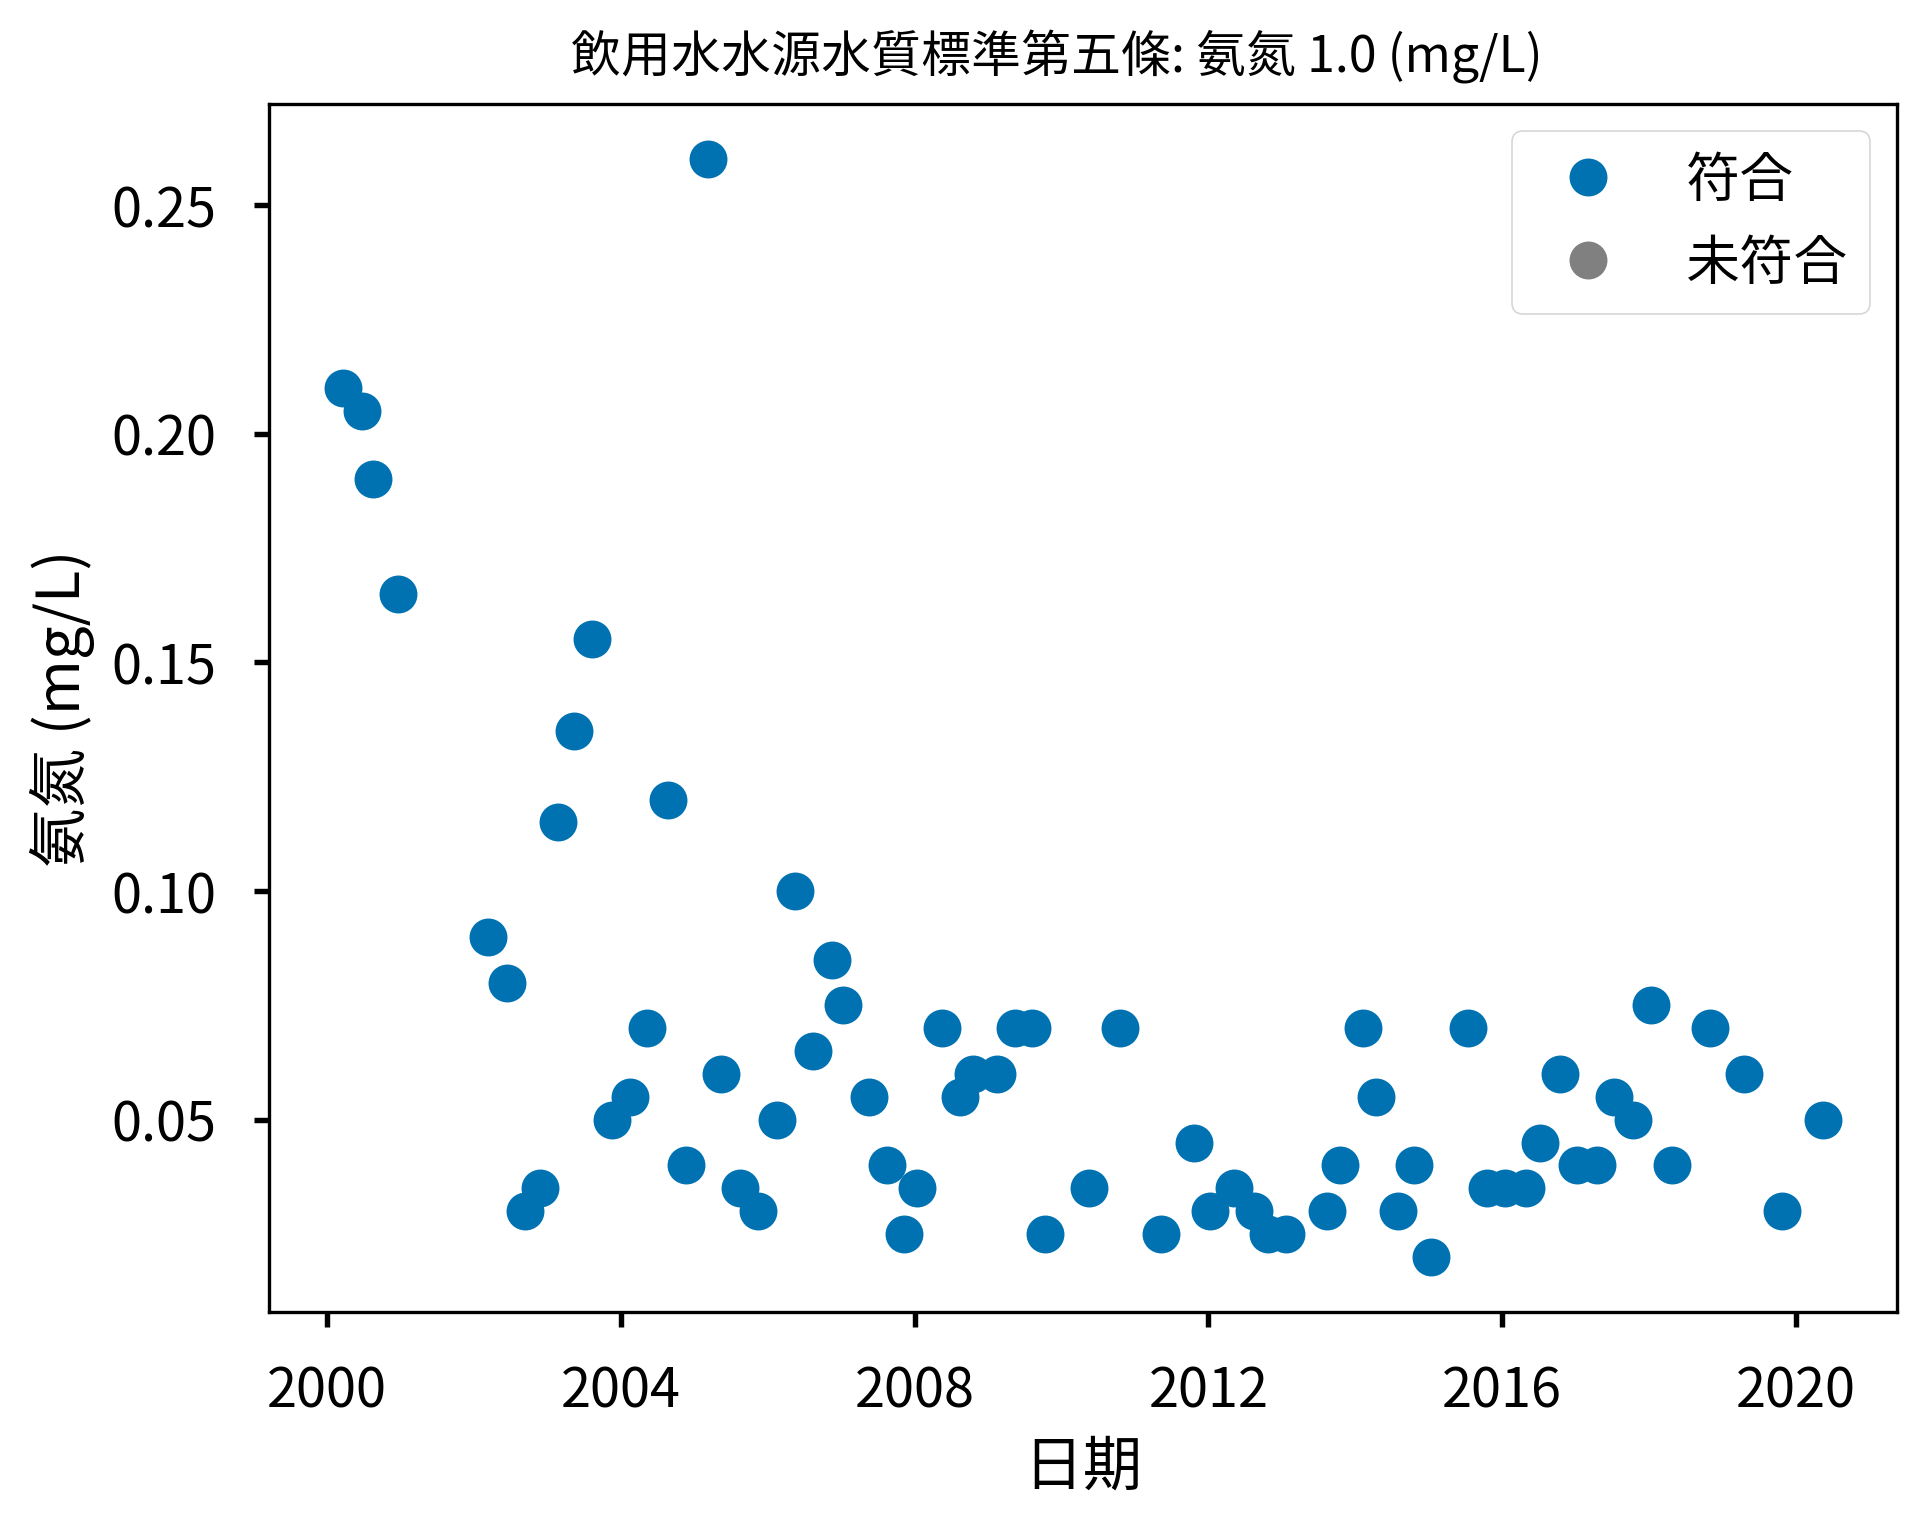

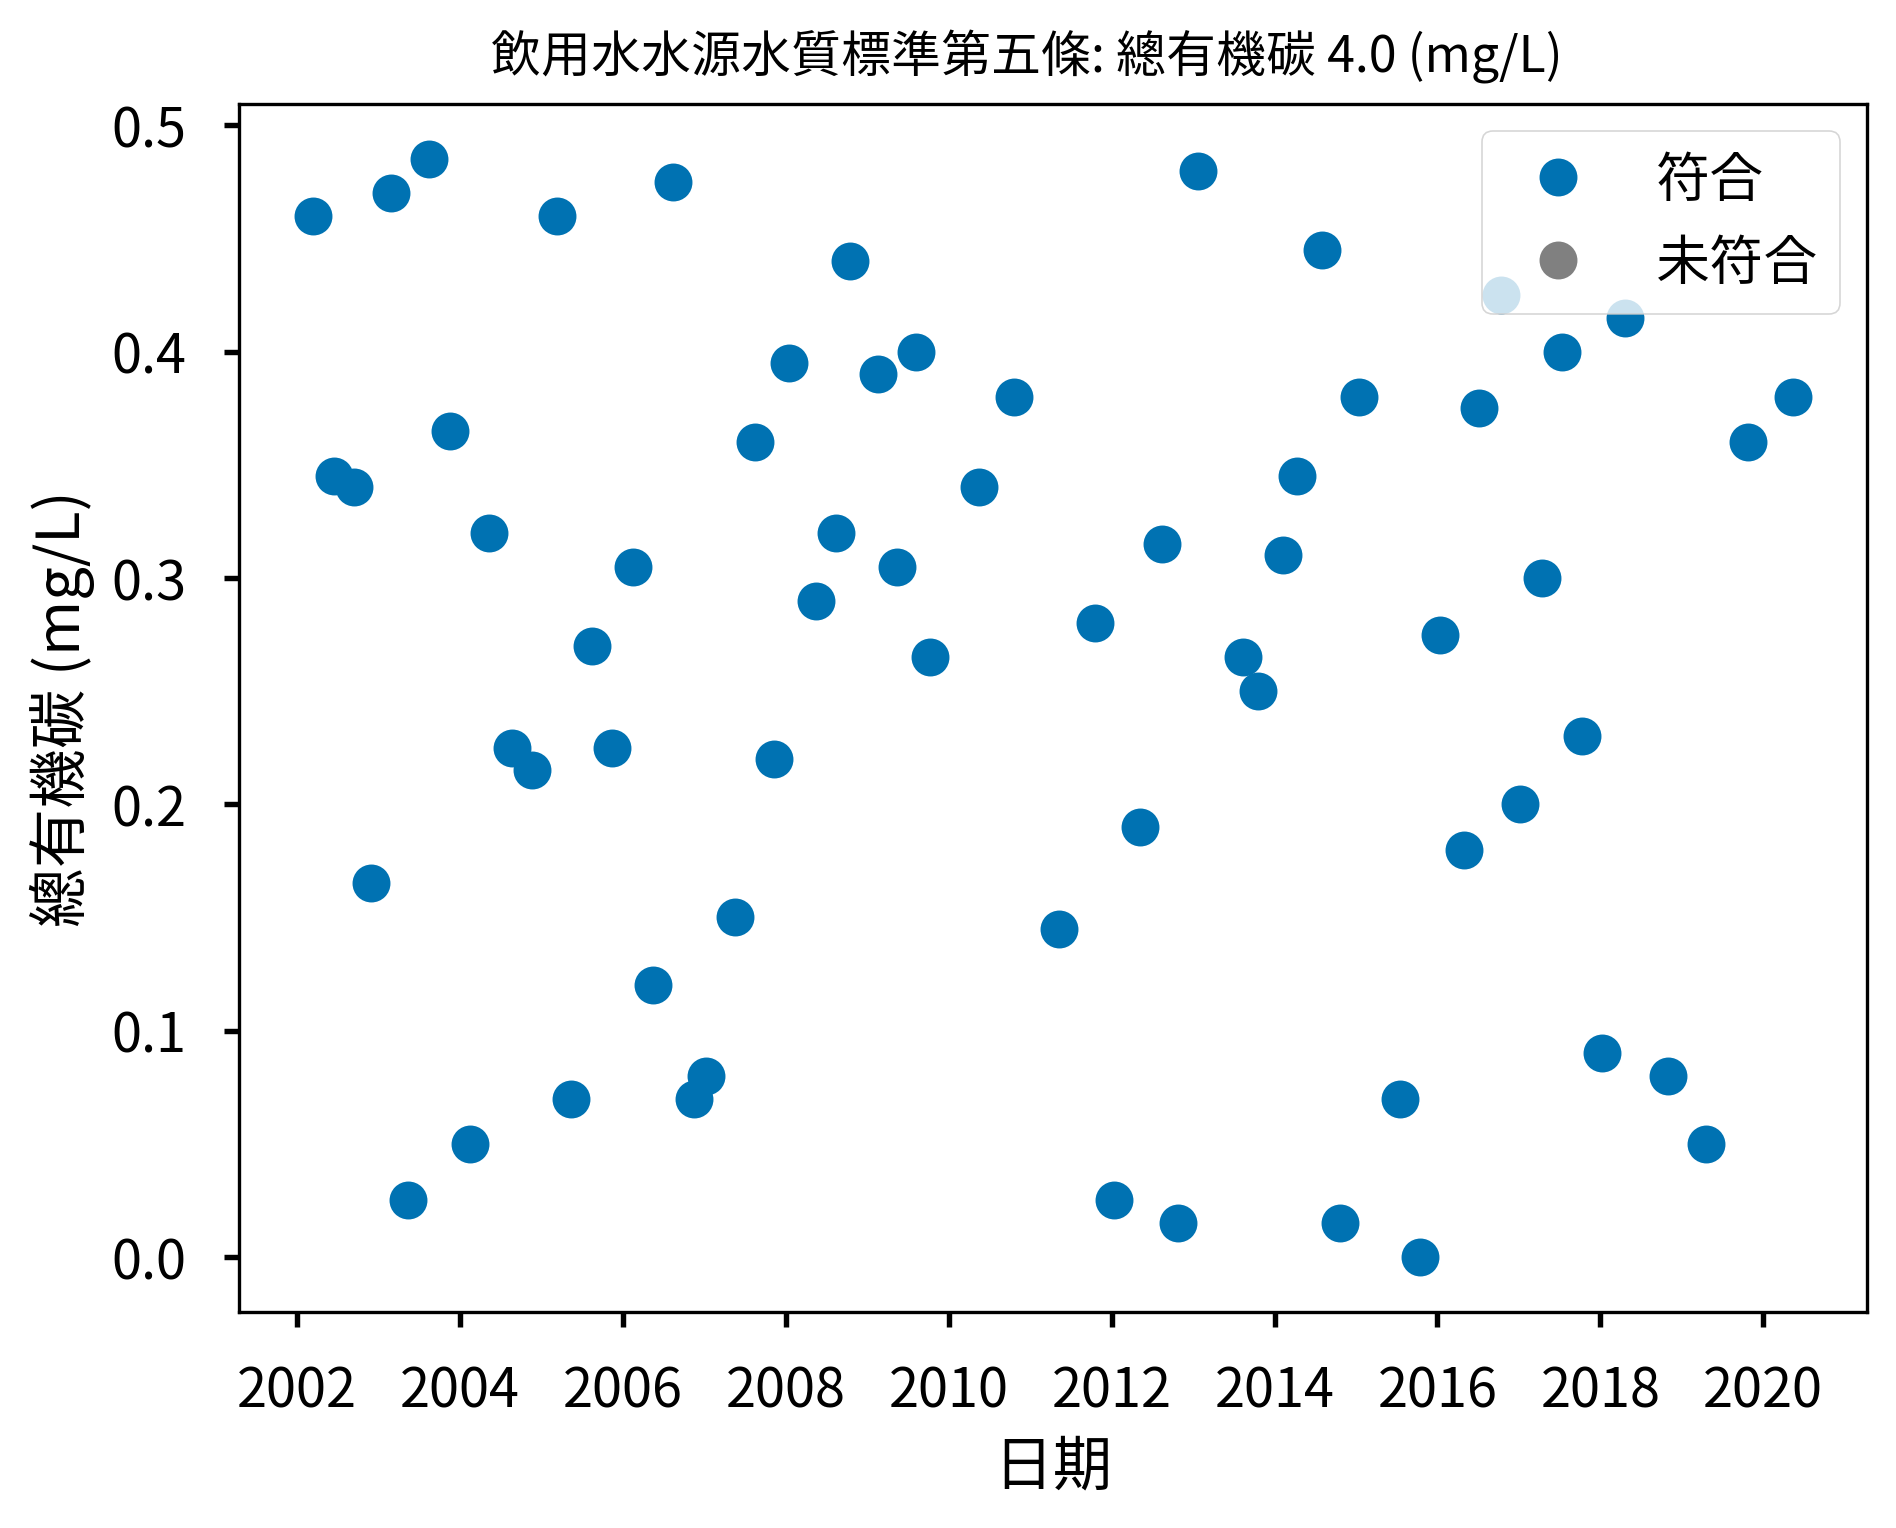

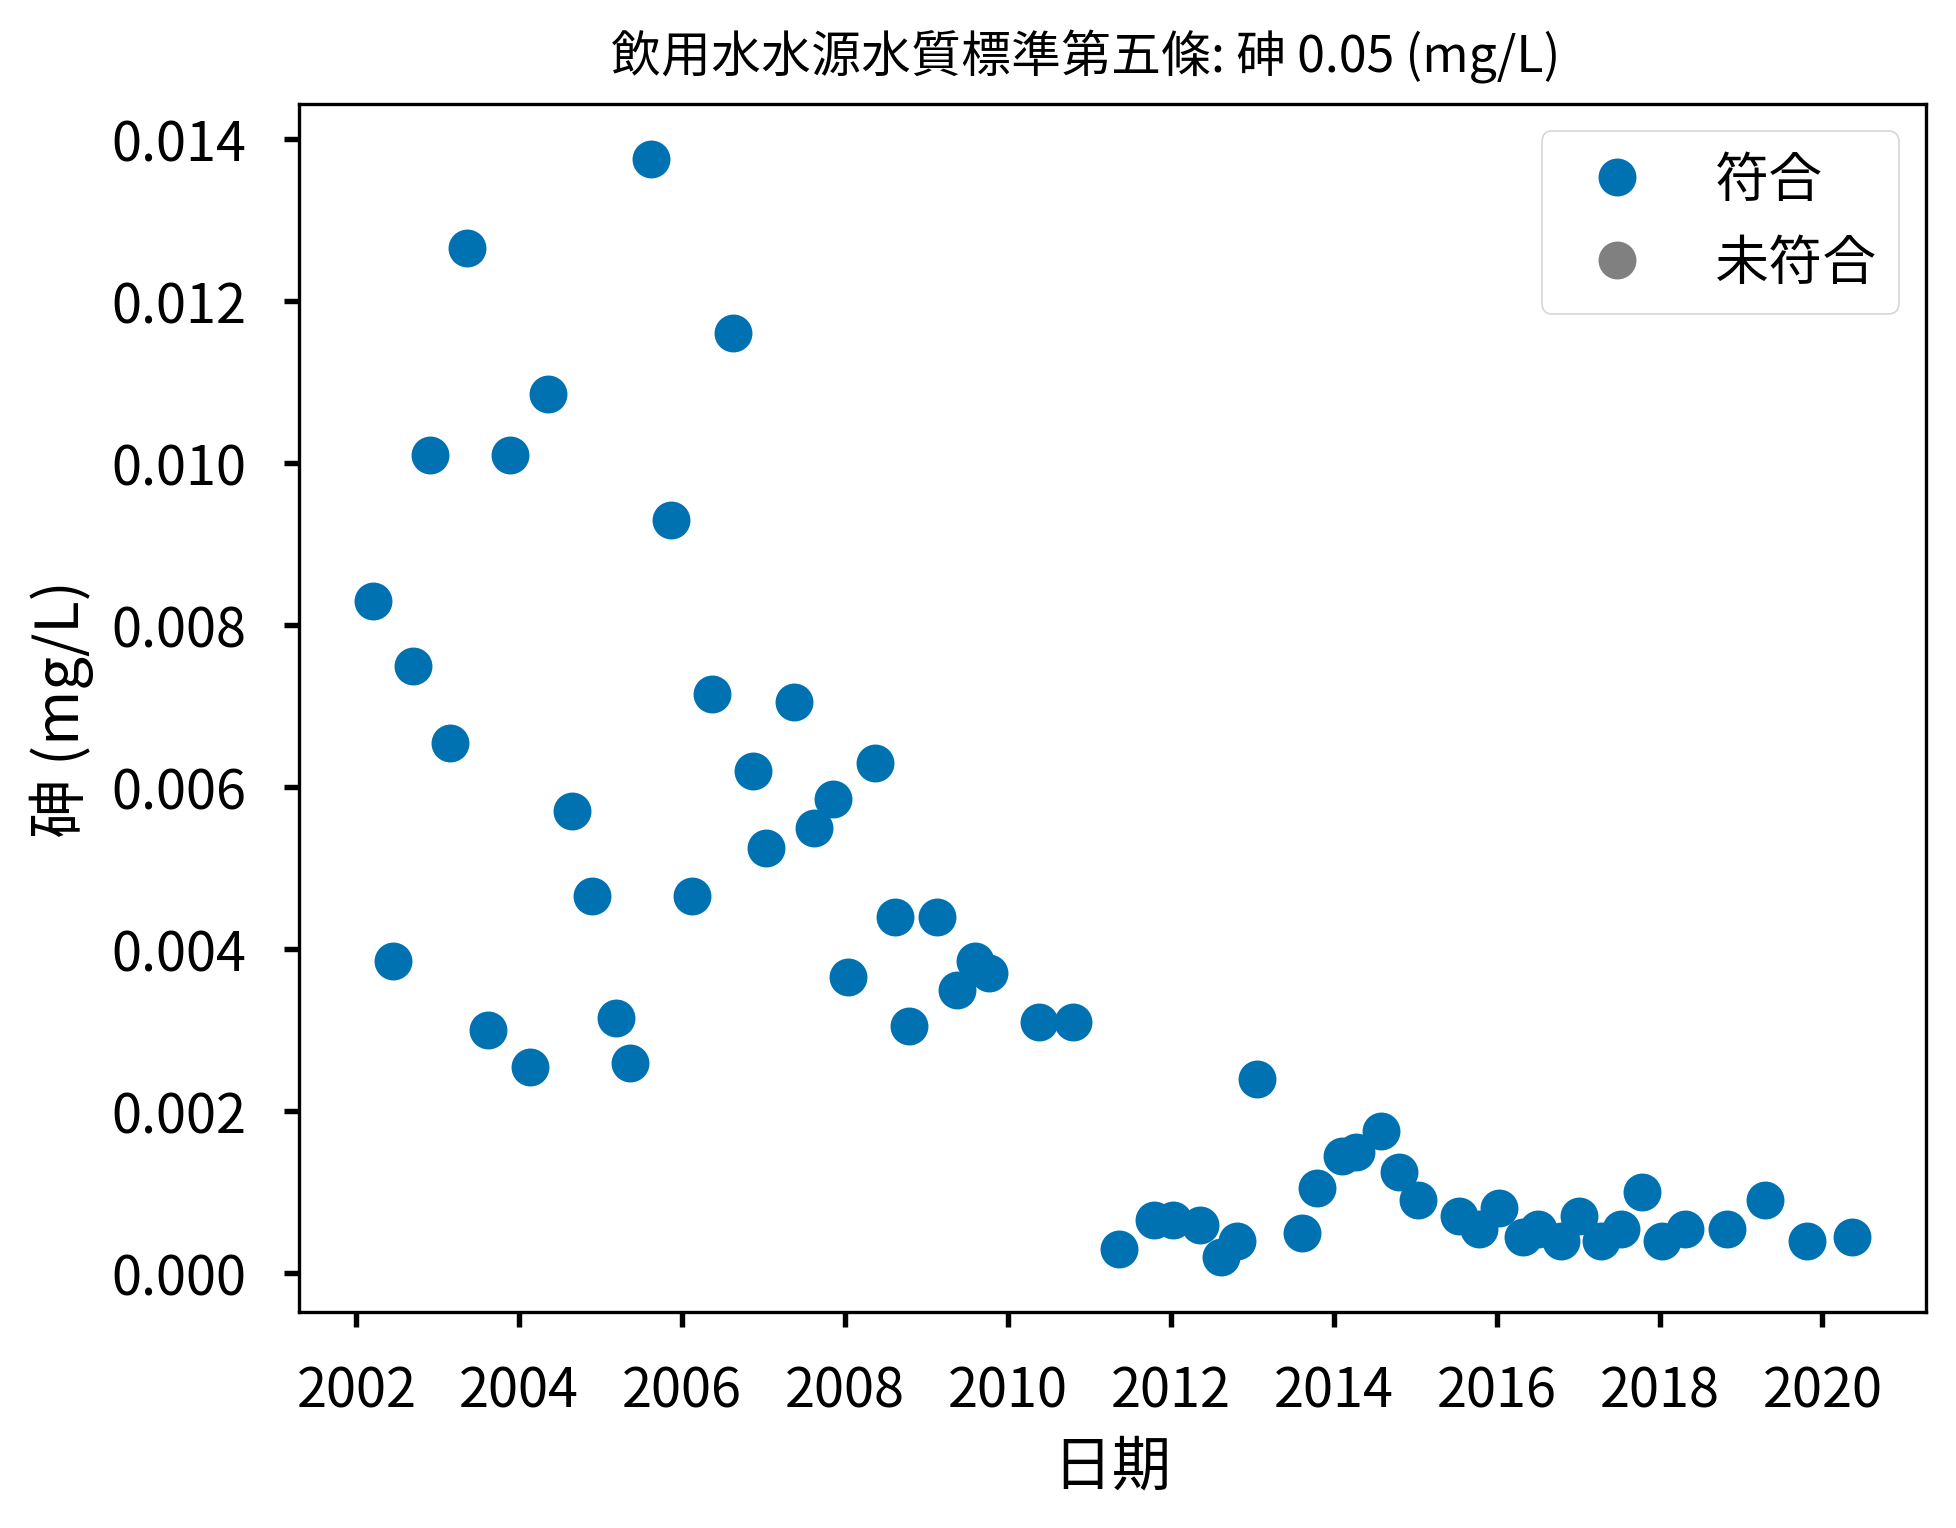

In [108]:
siteid = 4413
std_name = '飲用水水源水質標準第五條'
# select the analytes having value in the standard (std_name) and '日期'
cols = np.hstack([std_df.loc[~std_df[std_name].isna(), '項目'], '日期'])
# select the data points of that 
X = wa_df[wa_df['井號'] == siteid]
# select the analytes have values in the water quality dataset
X = X.loc[:, X.columns.isin(cols)]
X = X.loc[:, X.any(axis=0)].copy()
#y = std_df.loc[~std_df[std_name].isna(), ['項目', std_name]]
for analyte in X.columns[:3]:
    unit = std_df.loc[std_df['項目'] == analyte, '單位'].values[0]
    std_value = std_df.loc[std_df['項目'] == analyte, std_name].values[0]
    mask = X[analyte] < std_value

    plt.figure(figsize=(7, 5))
    plt.plot_date(X.loc[mask, '日期'], X.loc[mask, analyte], c='C0', xdate=True, label='符合')
    plt.plot_date(X.loc[~mask, '日期'], X.loc[~mask, analyte], c='gray', xdate=True, label='未符合')
    plt.xlabel('日期')
    plt.ylabel('{} ({})'.format(analyte, unit))
    plt.legend()
    plt.suptitle('{}: {} {} ({})'.format(std_name, analyte, std_value, unit))
    plt.subplots_adjust(top=.93)


In [5]:
savefig = False
if savefig:
    print('True')

In [2]:
import os
os.path.isdir('results/')

True

In [3]:
os.mkdir('test/')

# Another bug
The site 7010111, which should be in wa_df['井號'] otherwise it won't pass `Waterlvl.MarkbyEP()`, is not in wa_df['井號']....

In [1]:
import visualization
select = visualization.Waterquality()
select.plot(siteid='7010111', std_name='飲用水水源水質標準第五條', savefig=False)

Please check the siteid (井號) again.


In [3]:
wa_dir = 'data/database_ZAF_wa_merged_20211031.xlsx'
wa_df = pd.read_excel(wa_dir, parse_dates=['日期時間'])
wa_df['日期'] = pd.to_datetime([_.strftime('%Y-%m-%d') for _ in wa_df['日期時間']])
wa_df['井號'] = wa_df['井號'].astype(str)

In [12]:
'7010111' in wa_df['井號']

False

In [13]:
7010111 in wa_df['井號']

False

In [8]:
np.sort(wa_df['井號'].unique())

array(['070215T1', '10040111', '10040121', '10050111', '10050121',
       '10050131', '10050141', '10070111', '10070121', '10070131',
       '10070141', '10090111', '10090121', '10090131', '10090141', '4205',
       '4206', '4207', '4208', '4209', '4401', '4402', '4403', '4404',
       '4405', '4406', '4407', '4408', '4409', '4410', '4411', '4412',
       '4413', '4414', '4415', '4416', '4417', '4418', '4419', '4420',
       '4421', '4422', '4423', '4424', '4425', '4426', '4427', '4428',
       '4429', '4430', '4431', '4432', '4434', '4435', '4654', '4765',
       '4766', '4767', '4768', '4769', '4784', '4792', '4794', '4902',
       '4907', '4909', '4929', '7010111', '7010121', '7010131', '7010211',
       '7010221', '7020111', '7020121', '7020131', '7040111', '7040121',
       '7040131', '7040141', '7050112', '7050122', '7050132', '7050142',
       '7060111', '7060121', '7060131', '7060141', '7080111', '7080112',
       '7080121', '7080122', '7080131', '7080132', '7080141', '7100112'

Weird!! It does in the list!!!

In [14]:
'7010111' in wa_df['井號'].unique()

True

I don't get it...but at least it's a workaround.

# Demo how to use the script
The module is written in `visualization.py`. You can import it to plot the historical water quality of the desired siteid and standard. If you wish to output the figures, please set `savefig` to True. The figure is in png (200dpi) format.  The visualization uses the data in `database_ZAF_wa_merged_20211031.xlsx` and `stds_and_cols.xlsx`. It's recommended to go through `install_chinese_font.ipynb` first to make sure the Traditional Chinese words display properly.

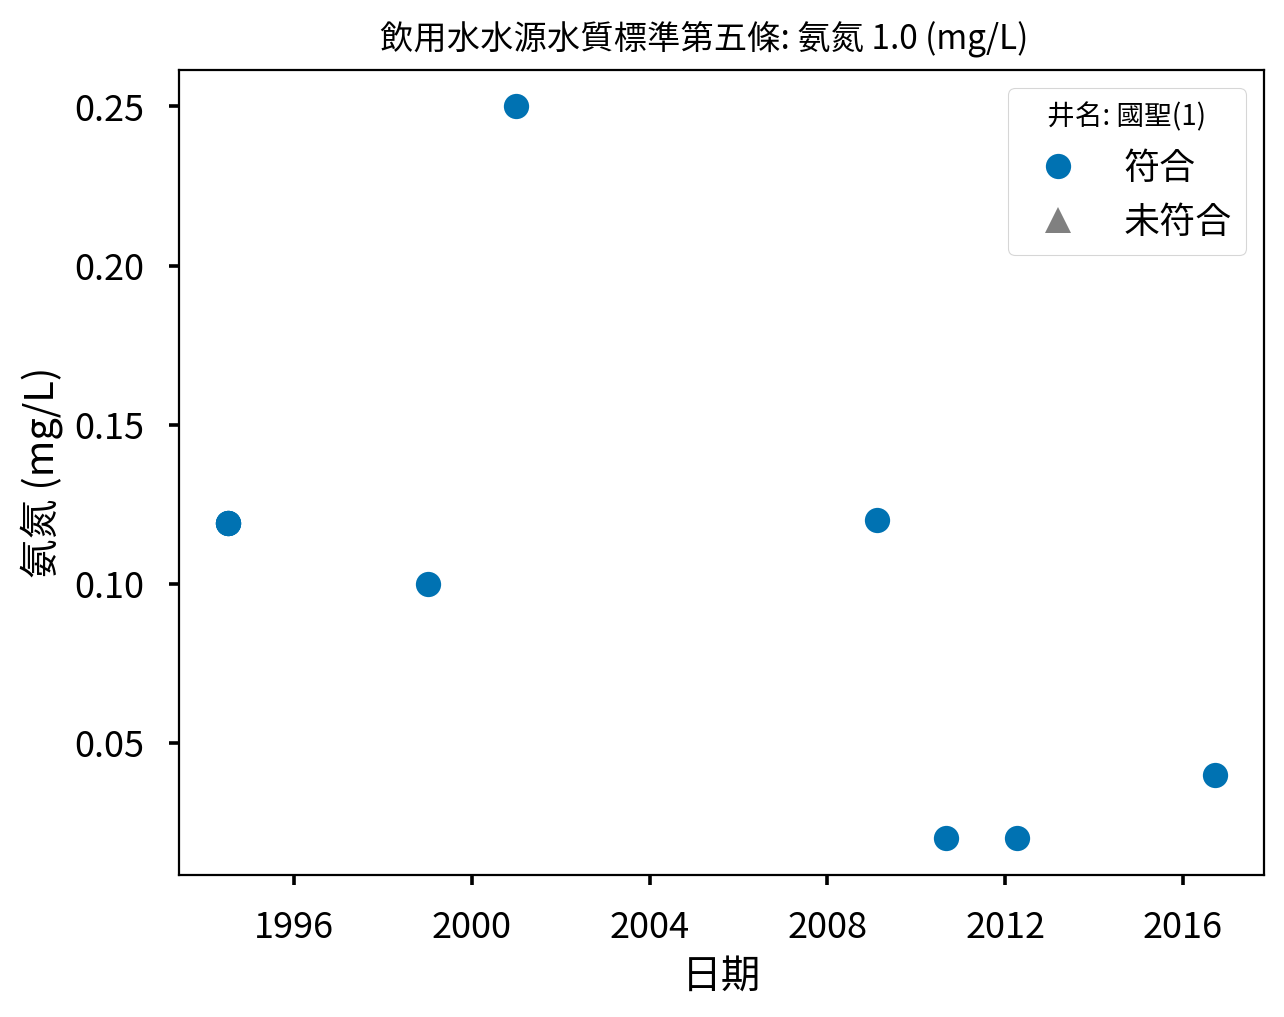

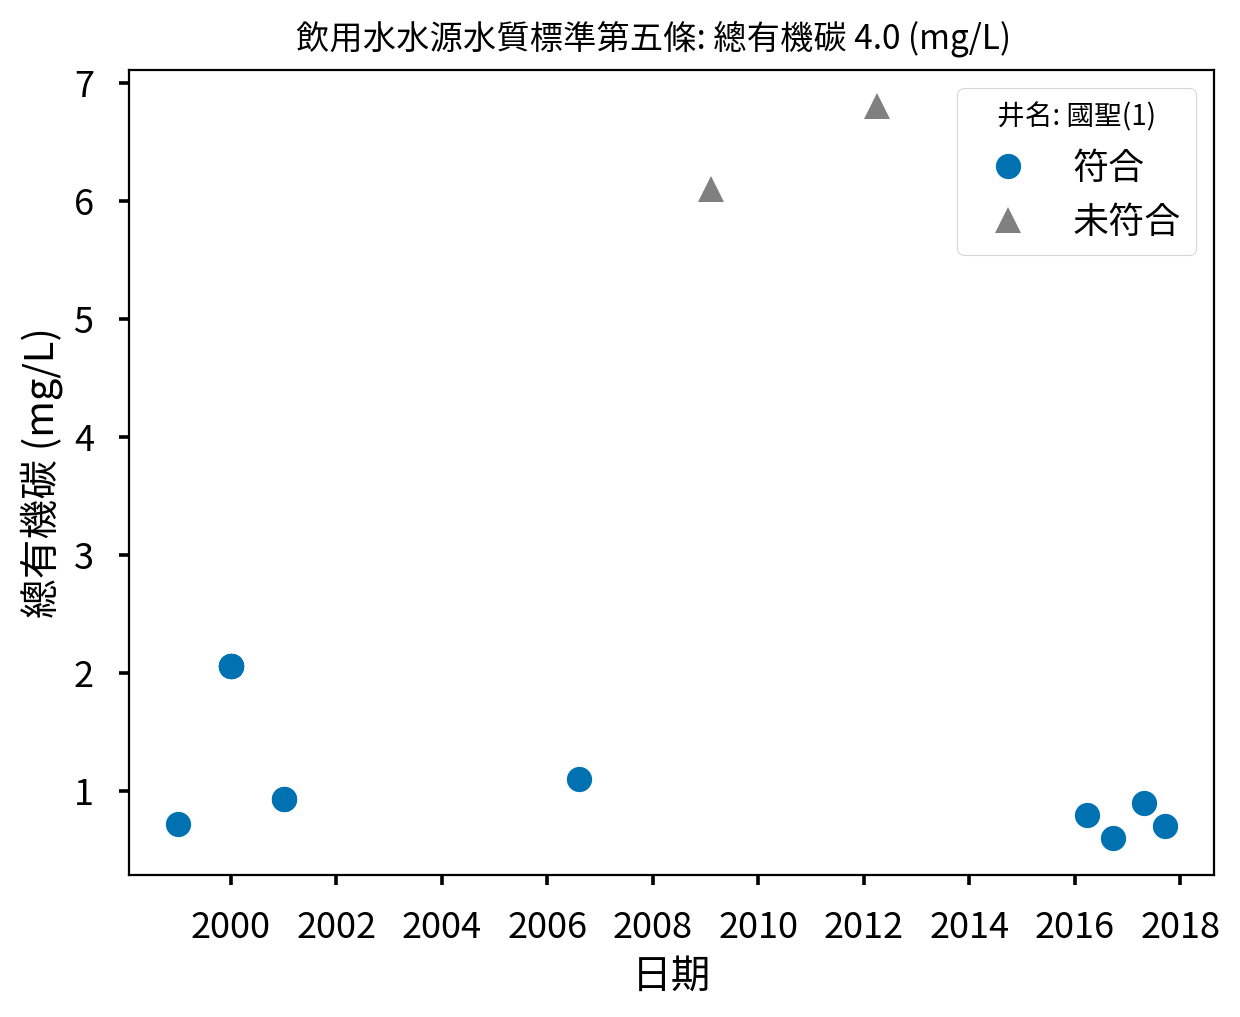

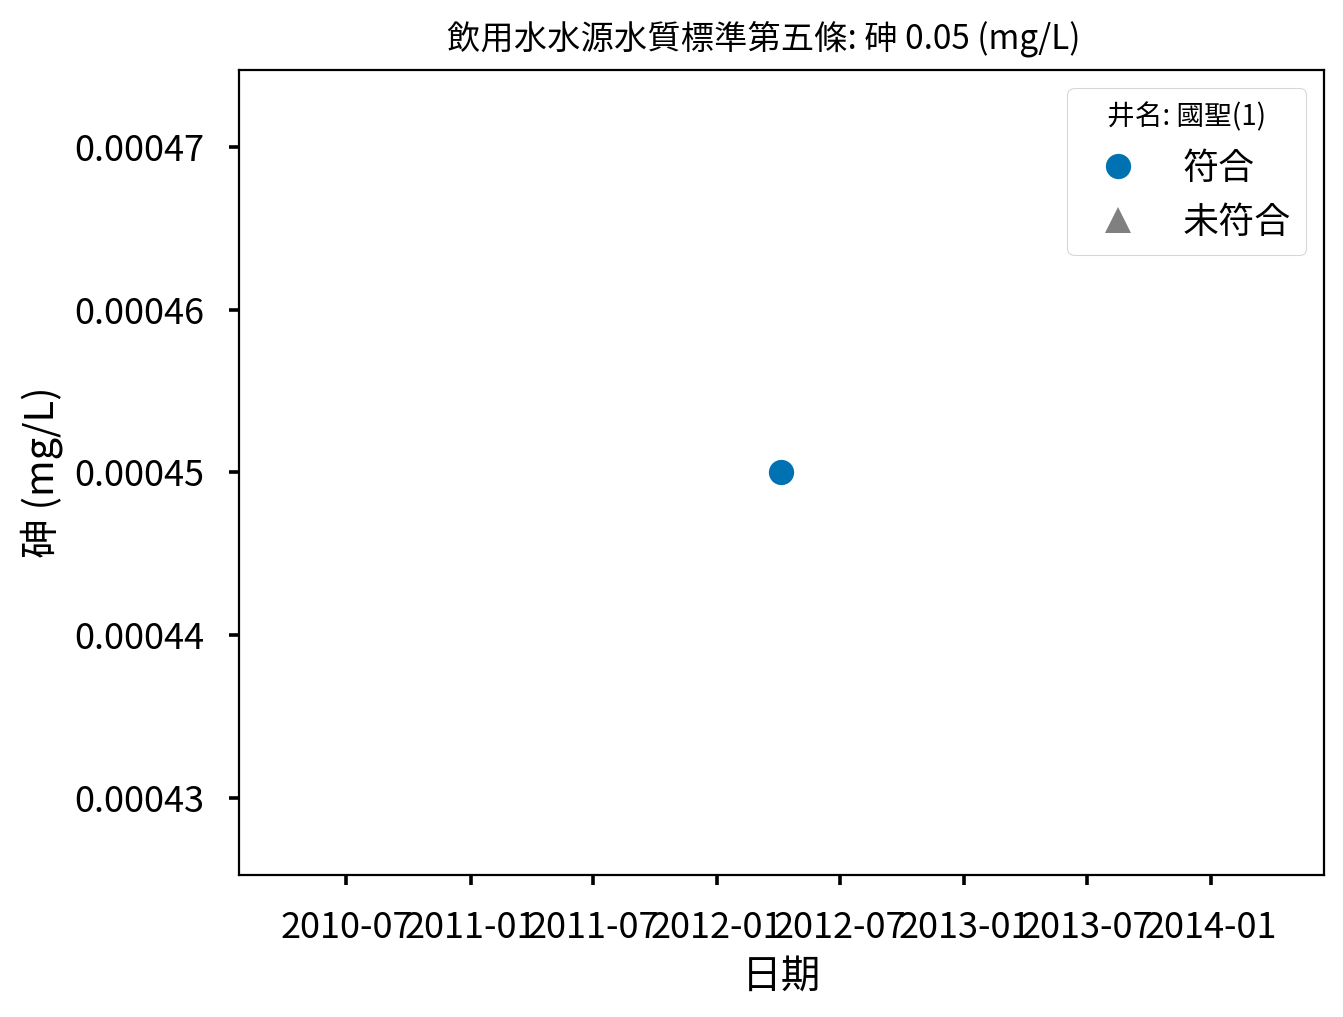

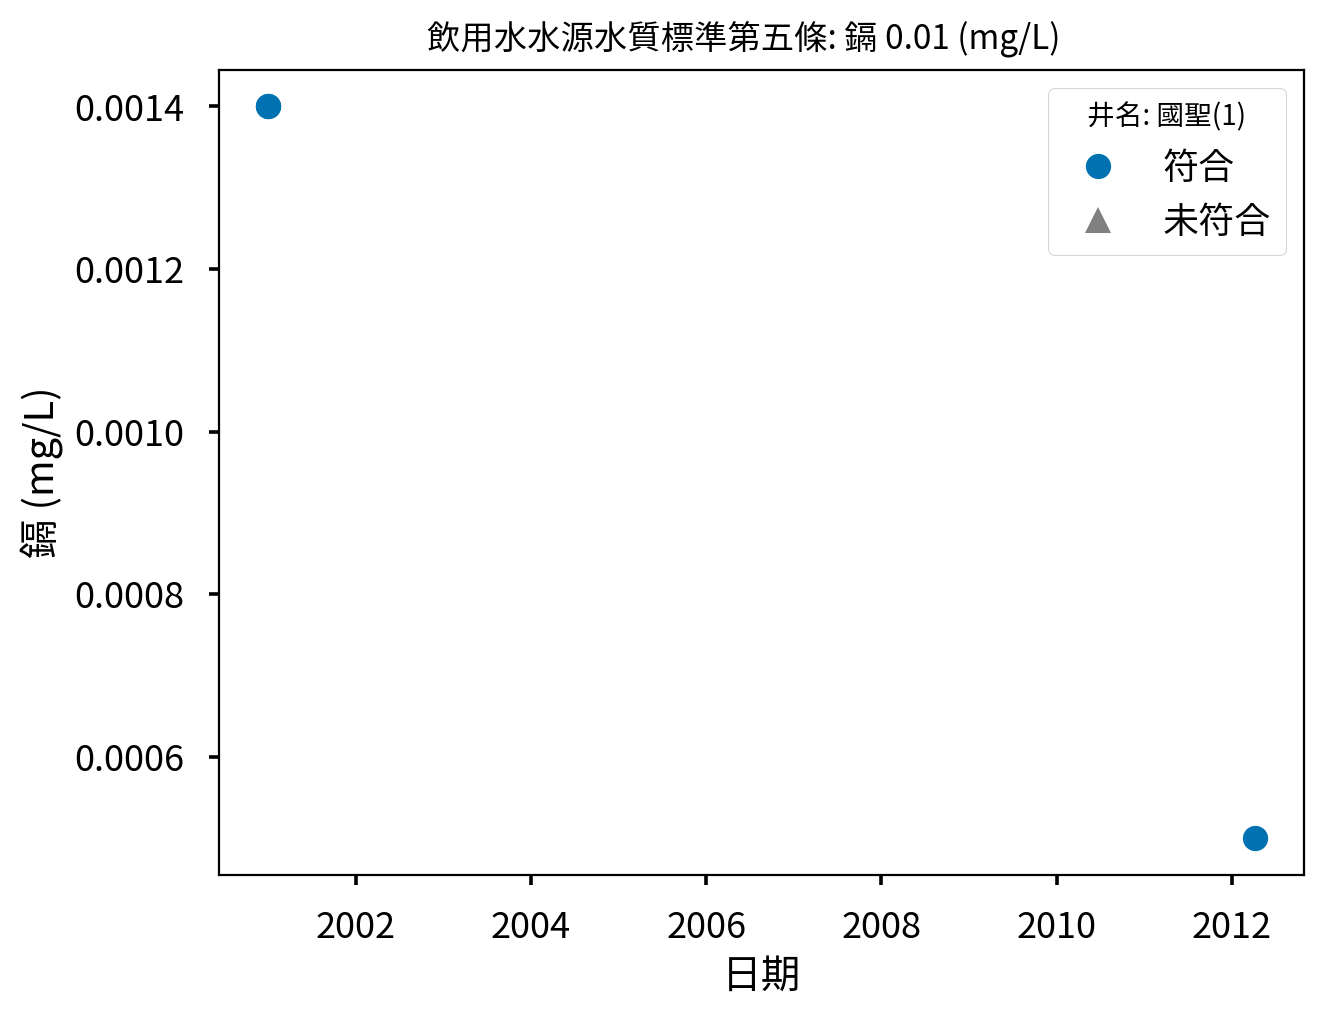

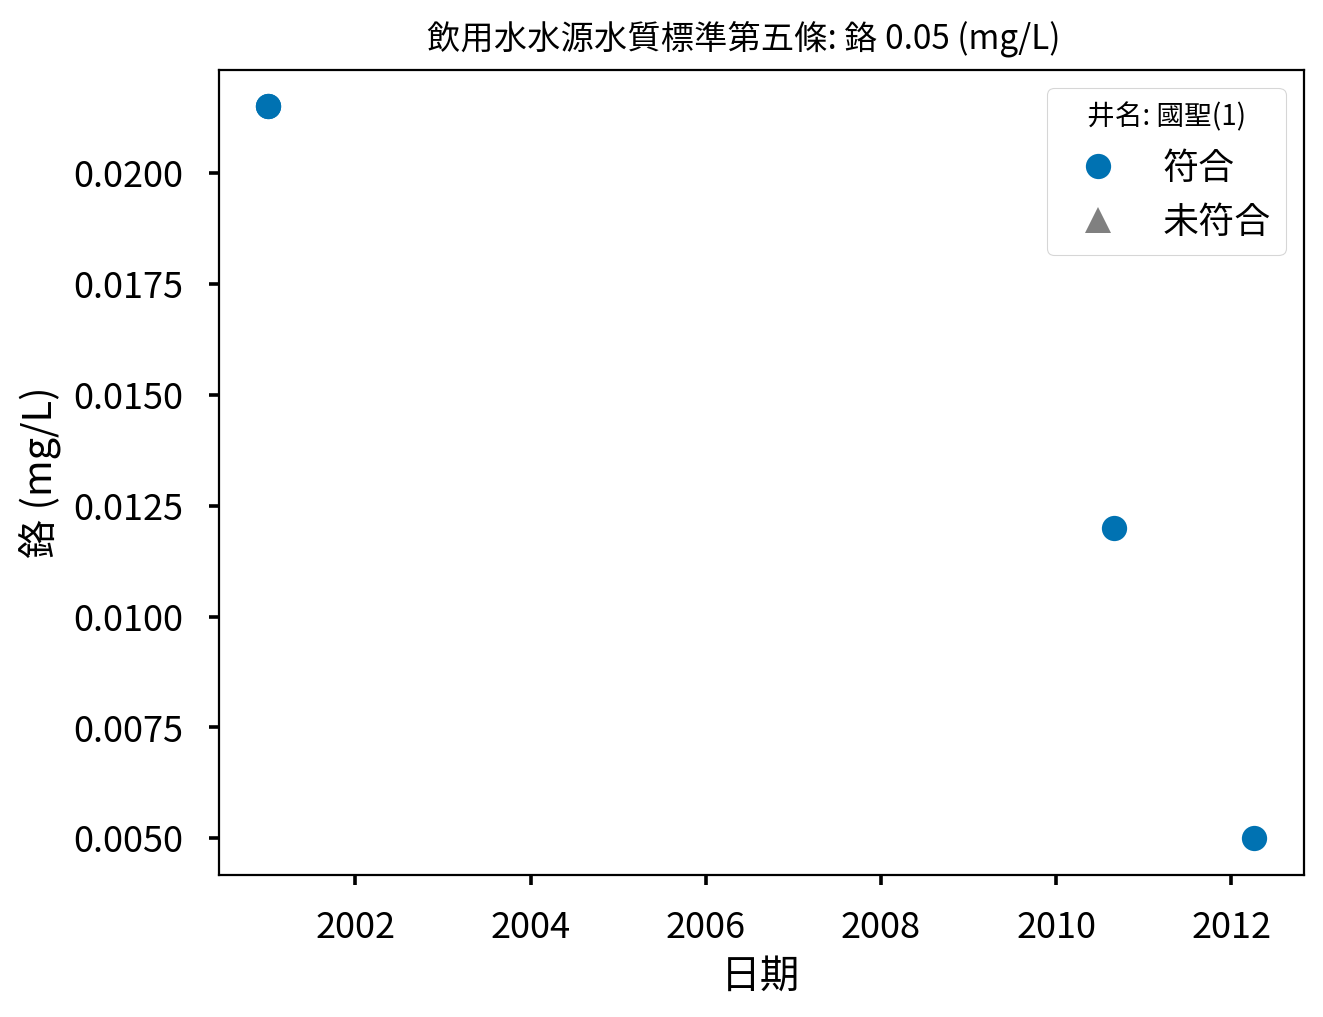

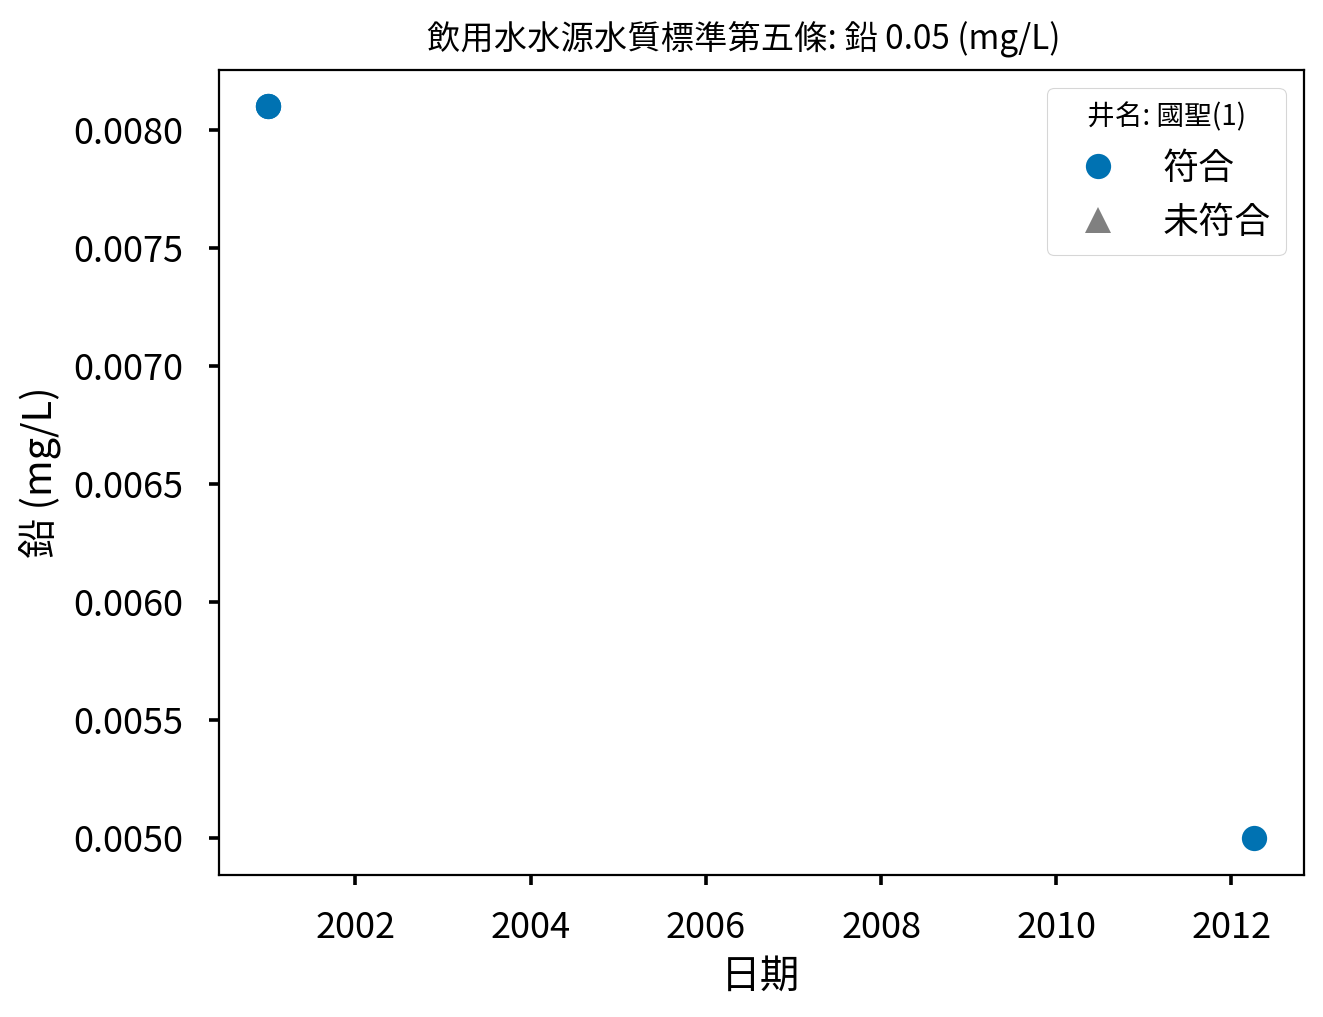

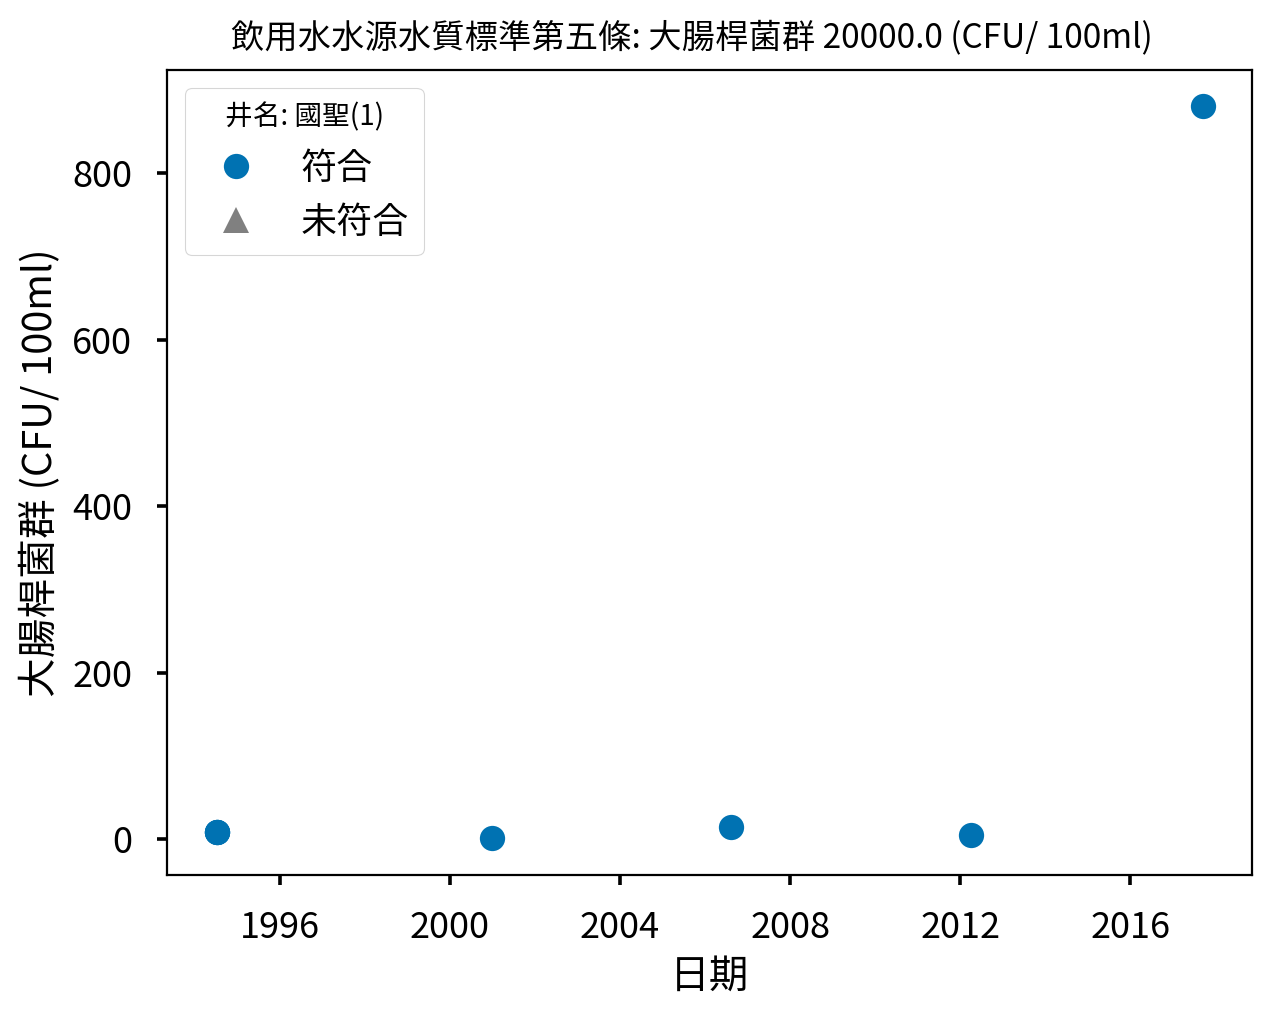

In [1]:
import visualization
select = visualization.Waterquality()
select.plot(siteid='7010111', std_name='飲用水水源水質標準第五條', savefig=False)

In [2]:
# wrong siteid
select.plot(siteid='441355', std_name='飲用水水源水質標準第五條')

Please check the siteid (井號) again.


In [3]:
# wrong standard
select.plot(siteid='4413', std_name='飲用水水源水質標準第八條')

Please input the std_name (法規名稱) in the list: ['飲用水水源水質標準第五條', '飲用水水源水質標準第六條', '地下水污染監測標準第一類', '地下水污染監測標準第二類', '地下水污染管制標準第一類', '地下水污染管制標準第二類', '灌溉用水水質標準', '再生水用於工業用途水質基礎建議值一', '再生水用於工業用途水質基礎建議值二']
